# Fatorial

# 01 - Passo: Instalando os pacotes

In [75]:
#%% Instalando os pacotes

## Executar na linha de comando do console (sem o #)

# pip install pandas
# pip install numpy
# pip install factor_analyzer
# pip install sympy
# pip install scipy
# pip install matplotlib
# pip install seaborn
# pip install plotly
# pip install pingouin
# pip install pyshp

In [76]:
#%% Importando os pacotes necessários

import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.graph_objects as go
import shapefile as shp
import warnings
warnings.filterwarnings("ignore")

In [77]:
#%% Importando o banco de dados

atlas = pd.read_excel("atlas_ambiental.xlsx")

In [78]:
atlas

,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,4,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,5,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


In [79]:
#%% Informações sobre as variáveis

# Informações gerais sobre o DataFrame

print(atlas.info())

# Estatísticas descritiva das variáveis

tab_desc = atlas.drop(columns=['cód_ibge']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cód_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB
None


In [80]:
#%% Separando somente as variáveis quantitativas do banco de dados

atlas_pca = atlas.drop(columns=['cód_ibge', 'distritos'])

In [81]:
atlas_pca

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...
91,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


In [82]:
#%% Matriz de correlações entre as variáveis

corr = atlas_pca.corr()

In [83]:
corr

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


In [84]:
# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text = corr.values,
        texttemplate = '%{text:.2f}',
        colorscale = 'viridis'))

fig.update_layout(
    height = 600,
    width = 600,
    yaxis = dict(autorange='reversed'),
    title = {'text':'Matriz de Correlações', 'x':0.50})

fig.write_html('correl_atlas.html')

In [85]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(atlas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

#   Resultado               ||      Interpretação
#   p-valor < 0.05.         ||      ✔️ Pode aplicar FA/PCA


Qui² Bartlett: 748.16
p-valor: 0.0


In [86]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=9, method='principal', rotation=None).fit(atlas_pca)

In [104]:
#%% Obtendo os eigenvalues (autovalores)

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

print(autovalores.sum())

[4.95603069 1.16433814 0.99635412 0.72406663 0.52930223 0.39832415
 0.12966871 0.06506649 0.03684884]
8.999999999999998


In [88]:
#%% Parametrizando a PCA para os fatores derivados de autovalores > 1

fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(atlas_pca)

In [89]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.956031   0.550670             0.550670
Fator 2   1.164338   0.129371             0.680041


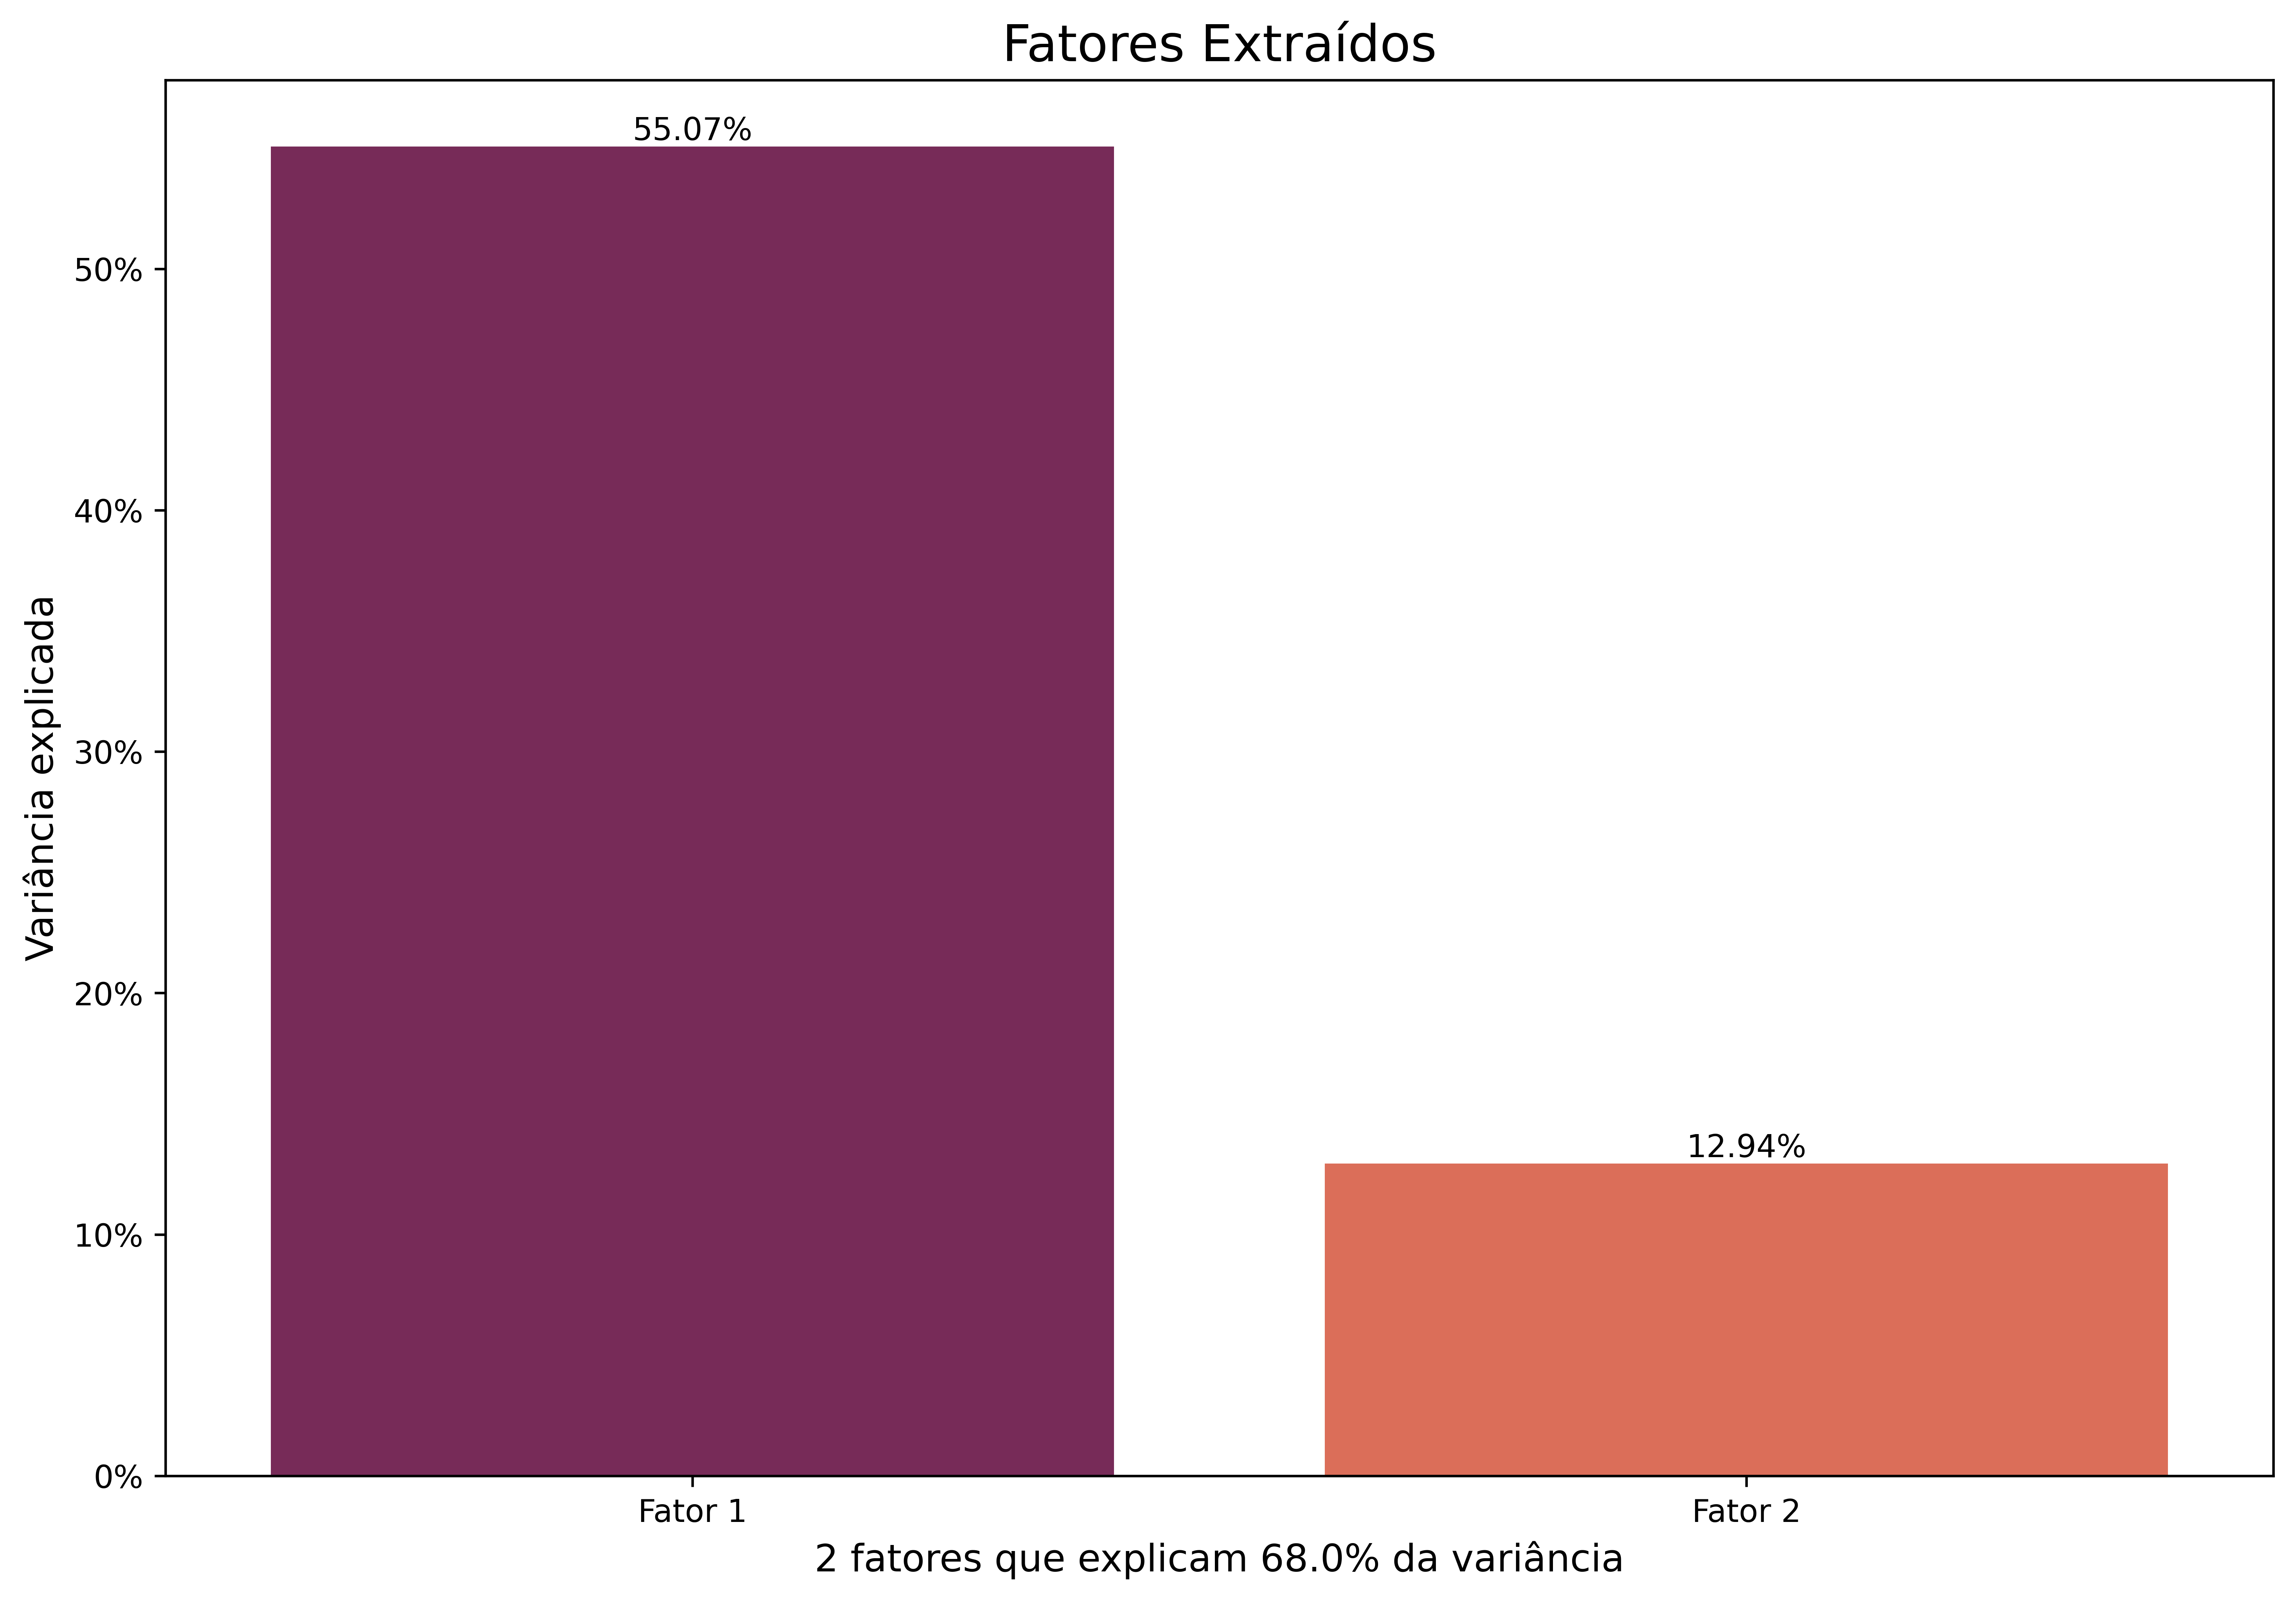

In [90]:
plt.figure(figsize=(12,8), dpi=600)

ax = sns.barplot(
    x=tabela_eigen.index.astype(str),
    y=tabela_eigen['Variância'],
    palette='rocket'
)

for container in ax.containers:
    labels = [f"{v*100:.2f}%" for v in container.datavalues]
    ax.bar_label(container, labels=labels)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x*100:.0f}%"))
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Variância explicada", fontsize=12)
plt.show()

In [91]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = atlas_pca.columns

print(tabela_cargas)

               Fator 1   Fator 2
renda         0.832127  0.368971
quota         0.900606  0.226453
escolaridade  0.966543 -0.024594
idade         0.960135 -0.065447
mortalidade  -0.655699 -0.176634
txcresc      -0.696781  0.337446
causasext    -0.666578 -0.043910
favel        -0.457185  0.442840
denspop       0.166281 -0.793048


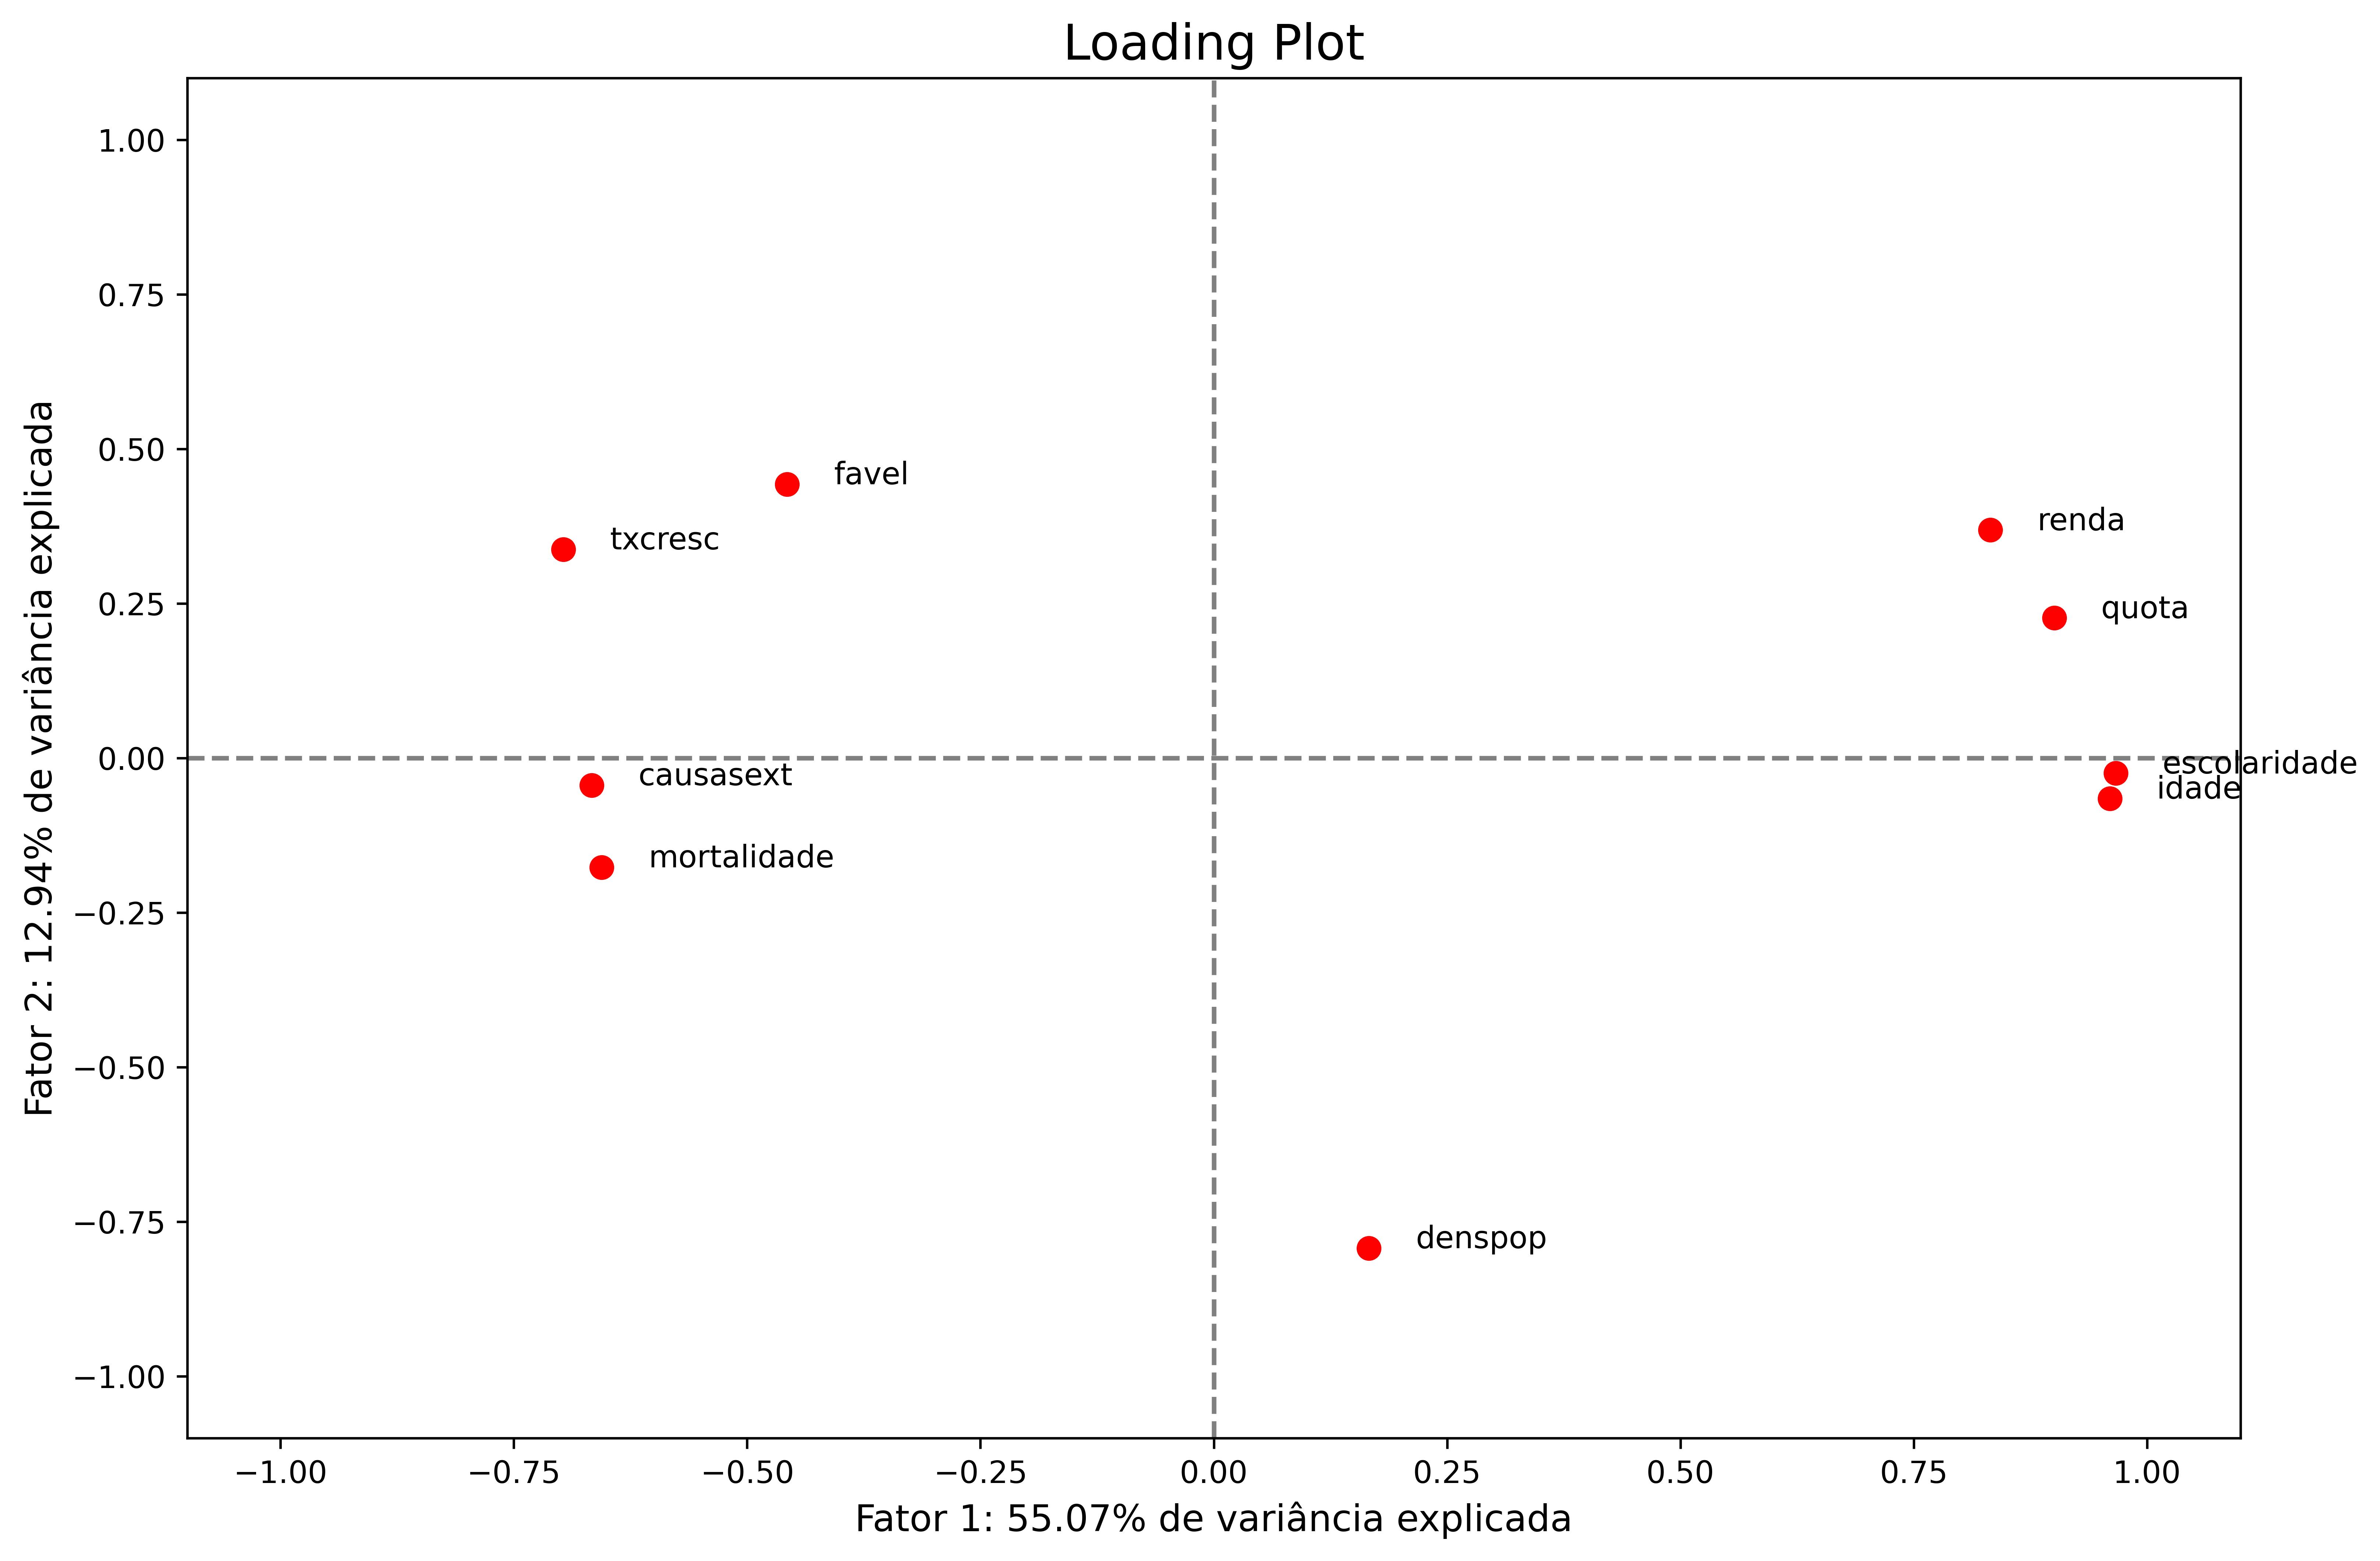

In [92]:
#%% Gráfico das cargas fatoriais (loading plot)

plt.figure(figsize=(12,8), dpi=600)
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

In [93]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = atlas_pca.columns

print(tabela_comunalidades)

              Comunalidades
renda              0.828575
quota              0.862372
escolaridade       0.934811
idade              0.926143
mortalidade        0.461141
txcresc            0.599374
causasext          0.446254
favel              0.405126
denspop            0.656574


In [94]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(atlas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

atlas = pd.concat([atlas.reset_index(drop=True), fatores], axis=1)
atlas

,cód_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Fator 1,Fator 2
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.705531
1,2,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565
2,3,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685
3,4,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935
4,5,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.099947,-1.738918
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.292861,-0.162769
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.203269,1.057936
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.117800,0.647456


In [95]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = atlas_pca.columns

print(tabela_scores)

               Fator 1   Fator 2
renda         0.167902  0.316893
quota         0.181719  0.194491
escolaridade  0.195024 -0.021122
idade         0.193731 -0.056210
mortalidade  -0.132303 -0.151703
txcresc      -0.140593  0.289818
causasext    -0.134498 -0.037712
favel        -0.092248  0.380336
denspop       0.033551 -0.681115


In [102]:
#%% Considere que o primeiro fator seja adequado para o ranking de distritos

# Note que adotamos um critério distinto da "soma ponderada"

dados_mapa = atlas[['cód_ibge', 'distritos', 'Fator 1']].sort_values(by=['cód_ibge'], ascending = True).reset_index(drop=True)
dados_mapa

,cód_ibge,distritos,Fator 1
0,1,Água Rasa,0.682371
1,2,Alto de Pinheiros,1.790304
2,3,Anhanguera,-1.204379
3,4,Aricanduva,-0.257928
4,5,Artur Alvim,-0.205284
...,...,...,...
91,92,Vila Medeiros,-0.099947
92,93,Vila Prudente,0.292861
93,94,Vila Sônia,0.203269
94,95,São Domingos,-0.117800


In [97]:
#%% Importando o mapa da cidade de São Paulo

sf = shp.Reader("DEINFO_DISTRITO")

def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [y[:] for y in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

dist = read_shapefile(sf)

# Fonte: http://dados.prefeitura.sp.gov.br/dataset/distritos

In [98]:
#%% Organizando o banco de dados das coordenadas

dist['COD_DIST'] = pd.to_numeric(dist['COD_DIST'])
dist = dist.sort_values(by=['COD_DIST'], ascending = True).reset_index(drop=True)

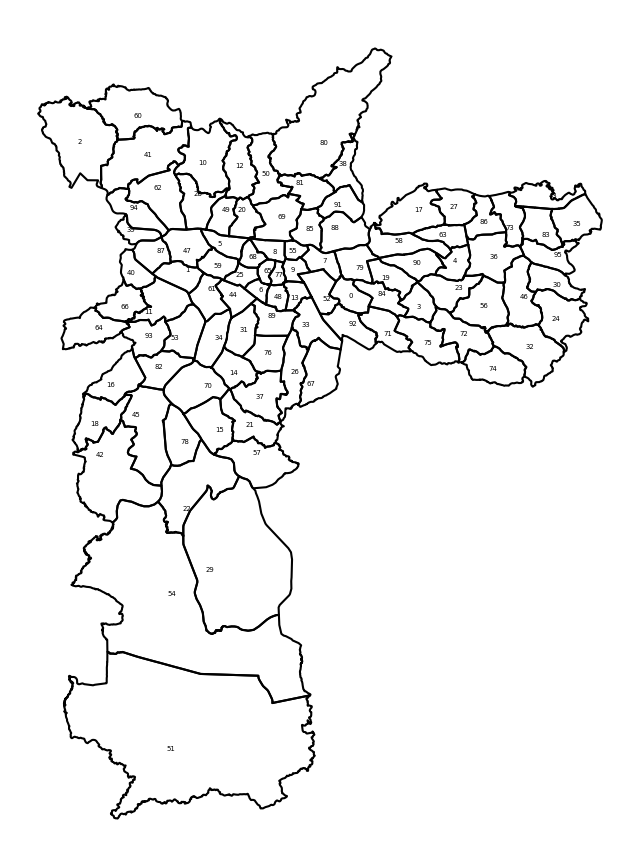

In [99]:
#%% Gerando o mapa da cidade de SP com distritos delimitados

def plot_map(df, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    id=0
    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=5, ha='center', va='center')
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    plt.axis('off')

plot_map(dist)

In [100]:
#%% Definindo as cores 

# Vamos dividir os valores do fator em 6 faixas

def calc_color(data):
        new_data = pd.qcut(data, 6, labels=list(range(6)))
        paleta = sns.color_palette('YlOrBr', n_colors=6)
        color_sq = paleta.as_hex()
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        return color_ton

<Figure size 800x1100 with 0 Axes>

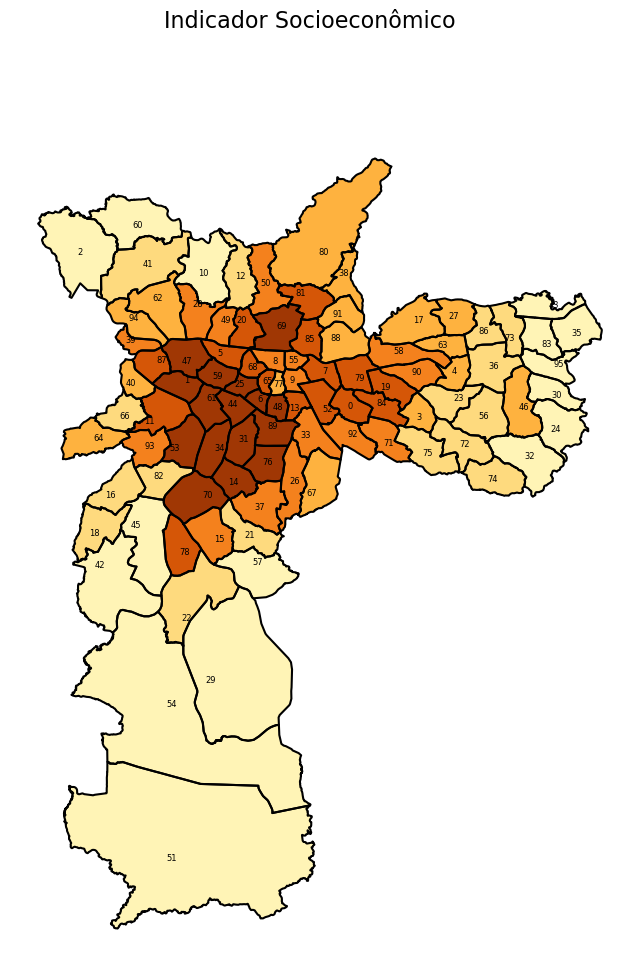

In [101]:
#%% Plotando o mapa com as cores

def plot_map_fill_multiples_ids_3(df, title, distrito_id, color_ton, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
            
    for id in distrito_id:
        shape_ex = df.coords[id]
        x_lon = np.zeros((len(shape_ex),1))
        y_lat = np.zeros((len(shape_ex),1))
        for ip in range(len(shape_ex)):
            x_lon[ip] = shape_ex[ip][0]
            y_lat[ip] = shape_ex[ip][1]
        ax.fill(x_lon,y_lat,  color_ton[distrito_id.index(id)]);
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=6, ha='center', va='center')
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    plt.axis('off')
        
distritos = list(np.arange(96)) # id_distritos
data = list(dados_mapa['Fator 1']) # indicador socioeconômico (fator)
color_ton = calc_color(data) # tonalidade de cores
plot_map_fill_multiples_ids_3(dist, 'Indicador Socioeconômico', distritos, color_ton)

#%% Fim!